Nama: Dicky Mochammad Sidiek 
Alamat: Kota Bandung, Jawa Barat
Id: dicky_siddiq_butz
Url: https://www.dicoding.com/users/dicky_siddiq_butz

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os

In [ ]:
pip install split_folders

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-10-29 08:25:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  6.01MB/s    in 62s     

2020-10-29 08:26:09 (4.99 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# cek isi folder
os.listdir('/tmp/rockpaperscissors')

['paper', 'rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'rock']

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\n Jika Akurasi Sudah Melampaui 97%, hentikan model.fit")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
from splitfolders import split as split_folders
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
split_folders.ratio(base_dir, output = "/tmp/rockpaperscissors", seed = 1337, ratio = (.6, .4))

train_dir = os.path.join("/tmp/rockpaperscissors", "train")
validation_dir = os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:00, 3738.49 files/s]


In [ ]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# membagi direktori data train dan data validasi
# rock
train_rock_dir, val_rock_dir = train_test_split (os.listdir (rock_dir), test_size = 0.4)

# paper
train_paper_dir, val_paper_dir = train_test_split (os.listdir (paper_dir), test_size = 0.4)

# scissors
train_paper_dir, val_paper_dir = train_test_split (os.listdir (scissors_dir), test_size = 0.4)

In [ ]:
train_rock = os.path.join (train_dir, 'rock')
train_paper = os.path.join (train_dir, 'paper')
train_scissors = os.path.join (train_dir, 'scissors')
val_rock = os.path.join (validation_dir, 'rock')
val_paper = os.path.join (validation_dir, 'paper')
val_scissors = os.path.join (validation_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(100, 150),  
        batch_size=4,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(100, 150),
        batch_size=4, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (100,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 21, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 10, 17, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 8, 15, 128)       

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=41,  
            epochs=20, 
            validation_data=validation_generator, 
            validation_steps=27,
            verbose =2,
              callbacks=[callbacks]
            )

Epoch 1/20
41/41 - 5s - loss: 0.1326 - accuracy: 0.9268 - val_loss: 0.1606 - val_accuracy: 0.9259
Epoch 2/20
41/41 - 5s - loss: 0.1123 - accuracy: 0.9512 - val_loss: 0.1060 - val_accuracy: 0.9259
Epoch 3/20
41/41 - 5s - loss: 0.0987 - accuracy: 0.9451 - val_loss: 0.1514 - val_accuracy: 0.9352
Epoch 4/20
41/41 - 5s - loss: 0.1238 - accuracy: 0.9146 - val_loss: 0.0433 - val_accuracy: 0.9815
Epoch 5/20
41/41 - 5s - loss: 0.1261 - accuracy: 0.9512 - val_loss: 0.1283 - val_accuracy: 0.9630
Epoch 6/20
41/41 - 5s - loss: 0.1009 - accuracy: 0.9390 - val_loss: 0.2049 - val_accuracy: 0.9167
Epoch 7/20
41/41 - 5s - loss: 0.0459 - accuracy: 0.9512 - val_loss: 0.2635 - val_accuracy: 0.9259
Epoch 8/20
41/41 - 5s - loss: 0.1206 - accuracy: 0.9695 - val_loss: 0.1297 - val_accuracy: 0.9537
Epoch 9/20
41/41 - 5s - loss: 0.0941 - accuracy: 0.9573 - val_loss: 0.2108 - val_accuracy: 0.9444
Epoch 10/20
41/41 - 5s - loss: 0.0930 - accuracy: 0.9512 - val_loss: 0.2505 - val_accuracy: 0.9074
Epoch 11/20
41/41 -

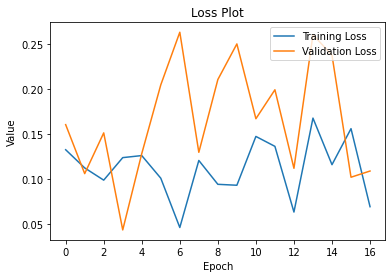

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

Saving 0Og76sl5CJhbxWWx.png to 0Og76sl5CJhbxWWx (2).png
0Og76sl5CJhbxWWx.png
paper


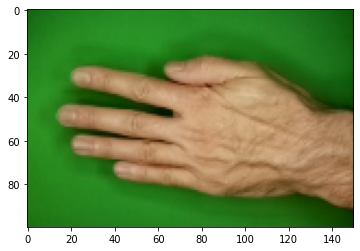

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')